In [20]:
# Import used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import csv
# link to dataset: 
# https://www.kaggle.com/datasets/jakewright/9000-tickers-of-stock-market-data-full-history
stock = pd.read_csv('stock_data.csv')
stock.head()

,Unnamed: 0,Date,Open,Close,Volume,Change
0,0,2019-11-10,2969.520472,2999.742644,967803,1.02
1,1,2019-11-17,2731.232389,2727.037939,895803,-0.15
2,2,2019-11-24,2603.829133,2602.605173,883489,-0.05
3,3,2019-12-01,2889.558251,2764.358493,784014,-4.33
4,4,2019-12-08,2485.534418,2440.562975,901310,-1.81


In [22]:
# Check data types of columns
print(stock.dtypes)

Unnamed: 0      int64
Date           object
Open          float64
Close         float64
Volume          int64
Change        float64
dtype: object


In [23]:
# Change date column to datetime datatype
stock['Date'] = pd.to_datetime(stock['Date'])
print(stock.dtypes)

Unnamed: 0             int64
Date          datetime64[ns]
Open                 float64
Close                float64
Volume                 int64
Change               float64
dtype: object


In [24]:
# Only use the past 5 years as data
stock = stock[stock['Date'] >= '2019-11-03'].reset_index(drop=True)
print(stock.head())

   Unnamed: 0       Date         Open        Close  Volume  Change
0           0 2019-11-10  2969.520472  2999.742644  967803    1.02
1           1 2019-11-17  2731.232389  2727.037939  895803   -0.15
2           2 2019-11-24  2603.829133  2602.605173  883489   -0.05
3           3 2019-12-01  2889.558251  2764.358493  784014   -4.33
4           4 2019-12-08  2485.534418  2440.562975  901310   -1.81


In [25]:
# Filter columns for relevant columns
stock = stock[['Date', 'Open', 'Close', 'Volume']]
print(stock.head())

        Date         Open        Close  Volume
0 2019-11-10  2969.520472  2999.742644  967803
1 2019-11-17  2731.232389  2727.037939  895803
2 2019-11-24  2603.829133  2602.605173  883489
3 2019-12-01  2889.558251  2764.358493  784014
4 2019-12-08  2485.534418  2440.562975  901310


In [26]:
# Check for null columns
print(stock.isnull().sum())

Date      0
Open      0
Close     0
Volume    0
dtype: int64


In [27]:
# Drop null columns and it doesn't seem to be a widespread issue
stock = stock.dropna()
print(stock.isnull().sum())

Date      0
Open      0
Close     0
Volume    0
dtype: int64


In [28]:
# Calculate price change as percentage
stock['Change'] = ((stock['Close'] - stock['Open']) 
                         / stock['Open'] * 100).round(2)
print(stock.head())

        Date         Open        Close  Volume  Change
0 2019-11-10  2969.520472  2999.742644  967803    1.02
1 2019-11-17  2731.232389  2727.037939  895803   -0.15
2 2019-11-24  2603.829133  2602.605173  883489   -0.05
3 2019-12-01  2889.558251  2764.358493  784014   -4.33
4 2019-12-08  2485.534418  2440.562975  901310   -1.81


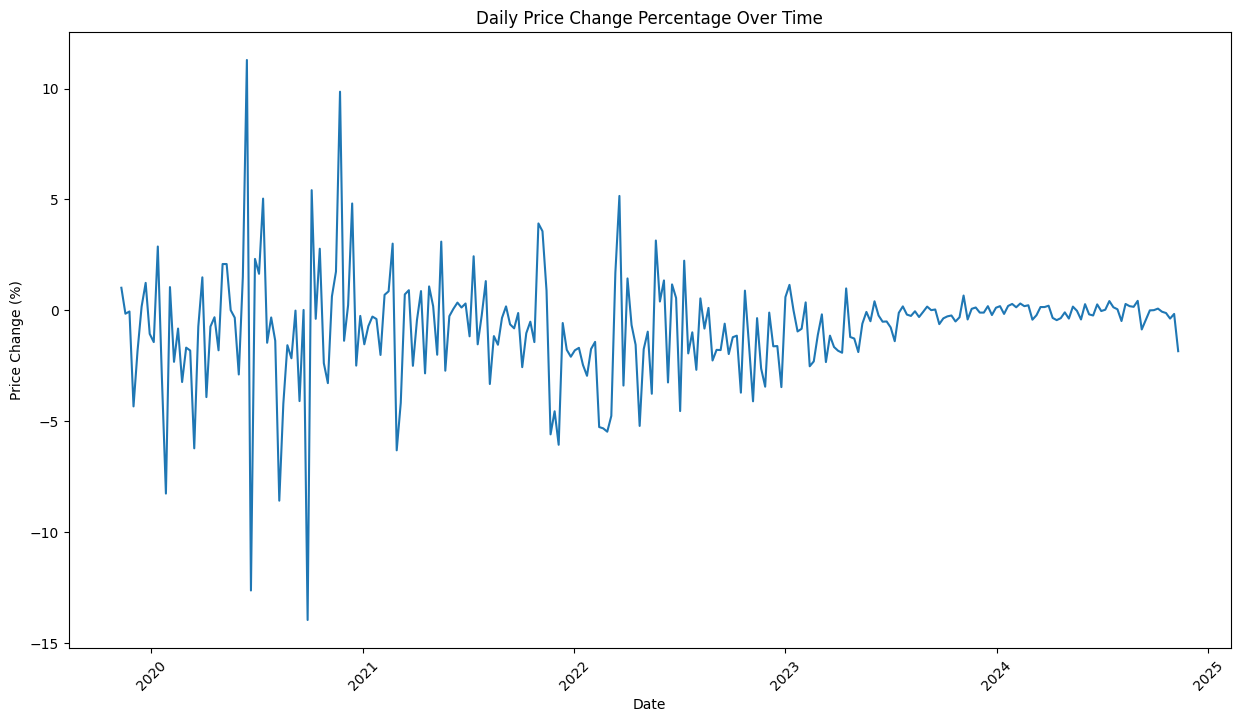

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(stock['Date'], stock['Change'])
plt.title('Daily Price Change Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Group by week and calculate mean
stock.set_index('Date', inplace=True)
stock = stock.resample('W').mean()
stock.reset_index(inplace=True)
# Round Volumn to nearest number
stock['Volume'] = stock['Volume'].round(0).astype(int)
print(stock.head())

        Date         Open        Close  Volume  Change
0 2019-11-10  2969.520472  2999.742644  967803    1.02
1 2019-11-17  2731.232389  2727.037939  895803   -0.15
2 2019-11-24  2603.829133  2602.605173  883489   -0.05
3 2019-12-01  2889.558251  2764.358493  784014   -4.33
4 2019-12-08  2485.534418  2440.562975  901310   -1.81


In [31]:
# Export dataframe as new dataset
stock.to_csv('stock_data.csv', index=True)

In [32]:
# Verify the export
test_read = pd.read_csv('stock_data.csv')
print(test_read.head())

   Unnamed: 0        Date         Open        Close  Volume  Change
0           0  2019-11-10  2969.520472  2999.742644  967803    1.02
1           1  2019-11-17  2731.232389  2727.037939  895803   -0.15
2           2  2019-11-24  2603.829133  2602.605173  883489   -0.05
3           3  2019-12-01  2889.558251  2764.358493  784014   -4.33
4           4  2019-12-08  2485.534418  2440.562975  901310   -1.81
